In [1]:
using CSV
using DataFrames
using Printf 
using Statistics
using Plots

file_path = "C:/Users/Usuario/Desktop/bottle.csv"  
bottle_data = CSV.read(file_path, DataFrame)

println("Primeras 10 filas del dataset:")
println(first(bottle_data, 5))


Primeras 10 filas del dataset:
5×74 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           Depthm  T_degC    Salnty    O2ml_L    STheta    O2Sat     Oxy_µmol/Kg  BtlNum   RecInd  T_prec  T_qual   S_prec  S_qual   P_qual  O_qual  SThtaq   O2Satq  ChlorA    Chlqua  Phaeop    Phaqua  PO4uM     PO4q    SiO3uM    SiO3qu  NO2uM     NO2q    NO3uM     NO3q    NH3uM     NH3q    C14As1    C14A1p   C14A1q  C14As2    C14A2p   C14A2q  DarkAs    DarkAp   DarkAq  MeanAs    MeanAp   MeanAq  IncTim     LightP    R_Depth  R_TEMP    R_POTEMP  R_SALINITY  R_SIGMA   R_SVA     R_DYNHT   R_O2      R_O2Sat   R_SIO3    R_PO4     R_NO3     R_NO2     R_NH4     R_CHLA    R_PHAEO   R_PRES  R_SAMP   DIC1      DIC2      TA1       TA2       pH2       pH1       DIC Quality Comment 
     │ Int64    Int64    String15     String                             Int64   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?     Int64?   Int64   Int64?  Int64?   Int64?  Int64?   Int64?  Int64?  I

## 1. dataShape: Obtener las dimensiones de los datos
Para obtener las dimensiones del conjunto de datos (número de filas y columnas):

In [2]:

function dataShape(data)
    return size(data)
end


println("Tamaño de los datos: ", dataShape(bottle_data))


Tamaño de los datos: (864863, 74)


## 2. dataType: Tipo de cada columna
Para obtener el tipo de datos de cada columna:

In [3]:
function dataType(data)
    return eltype.(eachcol(data))
end

println("Tipos de datos de cada columna: ", dataType(bottle_data))


Tipos de datos de cada columna: Type[Int64, Int64, String15, String, Int64, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Int64}, Int64, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missi

## 3. count_missing: Contar el número de valores nulos en una columna
Para contar cuántos valores nulos hay en una columna específica:

In [4]:
function count_missing(data, col)
    return count(ismissing, data[!, col])
end


col = "Oxy_µmol/Kg"  
println("Valores nulos en columna $col: ", count_missing(bottle_data, col))


Valores nulos en columna Oxy_µmol/Kg: 203595


## 4. dataMissingPercentage: Encontrar el porcentaje de valores nulos por columna
Para encontrar el porcentaje de valores faltantes en cada columna:

In [5]:
function count_missing_all_with_percentage(data)
    missing_count = Dict()
    total_rows = nrow(data)  
    for col in names(data)
        null_count = count(ismissing, data[!, col])
        null_percentage = (null_count / total_rows) * 100  
        missing_count[col] = (null_count, null_percentage)
    end
    return missing_count
end


missing_data = count_missing_all_with_percentage(bottle_data)
sorted_missing_data = sort(collect(missing_data), by = x -> x[2][1])


println("Número de valores nulos y porcentaje por columna (ordenados de menor a mayor):")

for (col, (null_count, null_percentage)) in sorted_missing_data
    println("$col: $null_count nulos, $(@sprintf("%.2f", null_percentage))%")
end

Número de valores nulos y porcentaje por columna (ordenados de menor a mayor):
Cst_Cnt: 0 nulos, 0.00%
Sta_ID: 0 nulos, 0.00%
R_Depth: 0 nulos, 0.00%
Depth_ID: 0 nulos, 0.00%
RecInd: 0 nulos, 0.00%
Depthm: 0 nulos, 0.00%
Btl_Cnt: 0 nulos, 0.00%
R_PRES: 0 nulos, 0.00%
R_TEMP: 10963 nulos, 1.27%
T_prec: 10963 nulos, 1.27%
T_degC: 10963 nulos, 1.27%
C14A2q: 16240 nulos, 1.88%
C14A1q: 16258 nulos, 1.88%
DarkAq: 24423 nulos, 2.82%
MeanAq: 24424 nulos, 2.82%
R_POTEMP: 46047 nulos, 5.32%
R_DYNHT: 46657 nulos, 5.39%
R_SALINITY: 47354 nulos, 5.48%
S_prec: 47354 nulos, 5.48%
Salnty: 47354 nulos, 5.48%
STheta: 52689 nulos, 6.09%
R_SVA: 52771 nulos, 6.10%
R_SIGMA: 52856 nulos, 6.11%
NH3q: 56564 nulos, 6.54%
R_O2: 168662 nulos, 19.50%
O2ml_L: 168662 nulos, 19.50%
P_qual: 191108 nulos, 22.10%
R_O2Sat: 198415 nulos, 22.94%
O2Sat: 203589 nulos, 23.54%
Oxy_µmol/Kg: 203595 nulos, 23.54%
Phaqua: 225693 nulos, 26.10%
Chlqua: 225697 nulos, 26.10%
NO3q: 334930 nulos, 38.73%
NO2q: 335389 nulos, 38.78%
SiO3qu

## 5. deleteColumns: Eliminar columnas con un porcentaje de nulos menor que un umbral dado


In [20]:

function dataMissingPercentage(data)
    missing_percent = Dict()
    total_rows = nrow(data)  
    for col in names(data)
        missing_count = count(ismissing, data[!, col])
        missing_percent[col] = (missing_count / total_rows) * 100  
    end
    return missing_percent
end

function deleteColumns(data, threshold)
    missing_percent = dataMissingPercentage(data)
    cols_to_delete = [col for col in names(data) if missing_percent[col] > threshold]
    return select(data, Not(cols_to_delete))
end


threshold = 30
bottle_data_clean = deleteColumns(bottle_data, threshold)
println("Datos después de eliminar columnas con mas del $threshold% de nulos:")
println(first(bottle_data_clean, 5))


Datos después de eliminar columnas con mas del 30% de nulos:
5×32 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           Depthm  T_degC    Salnty    O2ml_L    STheta    O2Sat     Oxy_µmol/Kg  RecInd  T_prec  S_prec  P_qual  Chlqua  Phaqua  NH3q    C14A1q  C14A2q  DarkAq  MeanAq  R_Depth  R_TEMP    R_POTEMP  R_SALINITY  R_SIGMA   R_SVA     R_DYNHT   R_O2      R_O2Sat   R_PRES 
     │ Int64    Int64    String15     String                             Int64   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?     Int64   Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Float64  Float64?  Float64?  Float64?    Float64?  Float64?  Float64?  Float64?  Float64?  Int64  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [21]:
missing_data = count_missing_all_with_percentage(bottle_data_clean)
sorted_missing_data = sort(collect(missing_data), by = x -> x[2][1])

println("Número de valores nulos y porcentaje por columna (ordenados de menor a mayor):")
for (col, (null_count, null_percentage)) in sorted_missing_data
    println("$col: $null_count nulos, $(@sprintf("%.2f", null_percentage))%")
end

Número de valores nulos y porcentaje por columna (ordenados de menor a mayor):
Cst_Cnt: 0 nulos, 0.00%
RecInd: 0 nulos, 0.00%
Sta_ID: 0 nulos, 0.00%
R_Depth: 0 nulos, 0.00%
Depthm: 0 nulos, 0.00%
Btl_Cnt: 0 nulos, 0.00%
R_PRES: 0 nulos, 0.00%
Depth_ID: 0 nulos, 0.00%
R_TEMP: 10963 nulos, 1.27%
T_degC: 10963 nulos, 1.27%
T_prec: 10963 nulos, 1.27%
C14A2q: 16240 nulos, 1.88%
C14A1q: 16258 nulos, 1.88%
DarkAq: 24423 nulos, 2.82%
MeanAq: 24424 nulos, 2.82%
R_POTEMP: 46047 nulos, 5.32%
R_DYNHT: 46657 nulos, 5.39%
R_SALINITY: 47354 nulos, 5.48%
S_prec: 47354 nulos, 5.48%
Salnty: 47354 nulos, 5.48%
STheta: 52689 nulos, 6.09%
R_SVA: 52771 nulos, 6.10%
R_SIGMA: 52856 nulos, 6.11%
NH3q: 56564 nulos, 6.54%
O2ml_L: 168662 nulos, 19.50%
R_O2: 168662 nulos, 19.50%
P_qual: 191108 nulos, 22.10%
R_O2Sat: 198415 nulos, 22.94%
O2Sat: 203589 nulos, 23.54%
Oxy_µmol/Kg: 203595 nulos, 23.54%
Phaqua: 225693 nulos, 26.10%
Chlqua: 225697 nulos, 26.10%


## 6. calcularCorrelación: Crear la matriz de clasificación entre columnas
Para calcular la evaluación entre las columnas numéricas del conjunto de datos:




In [22]:
function calculateCorrelation(data)
    numeric_cols = names(data)[map(x -> eltype(data[!, x]) <: Real, names(data))]
    numeric_data = data[:, numeric_cols]
    return cor(Matrix(numeric_data))
end

# Llamar a la función para obtener la matriz de correlación
println("Matriz de correlación: ", calculateCorrelation(bottle_data_clean))


Matriz de correlación: [1.0 0.9993450094378044 -0.16222238751806053 -0.10014210235635841 -0.16221971496243484 -0.16196071499221773; 0.9993450094378044 1.0 -0.16161667042737526 -0.10082771939568301 -0.16161392343184502 -0.1613476160670553; -0.16222238751806053 -0.16161667042737526 1.0 0.08231579840340995 0.9999999972815448 0.9999939222811604; -0.10014210235635841 -0.10082771939568301 0.08231579840340995 1.0 0.08231705049444102 0.08218347201418473; -0.16221971496243484 -0.16161392343184502 0.9999999972815448 0.08231705049444102 1.0 0.9999939296558; -0.16196071499221773 -0.1613476160670553 0.9999939222811604 0.08218347201418473 0.9999939296558 1.0]


## 7. displayCorrelation: Mostrar la clasificación usando un mapa de calor

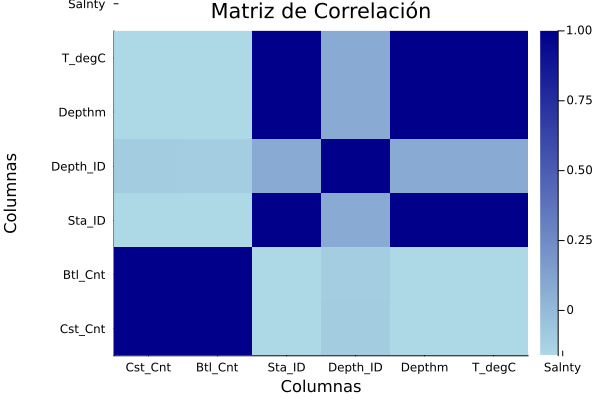

In [23]:
function calculateCorrelation(data)
    numeric_cols = names(data)[map(x -> eltype(data[!, x]) <: Real, names(data))]
    numeric_data = data[:, numeric_cols]
    
    return cor(Matrix(numeric_data))
end


function displayCorrelation(data)
    
    corr_matrix = calculateCorrelation(data)
    
    
    heatmap(corr_matrix, 
            title="Matriz de Correlación", 
            xlabel="Columnas", 
            ylabel="Columnas", 
            xticks=(1:length(names(data)), names(data)),  
            yticks=(1:length(names(data)), names(data)),  
            color=:blues)  
end


displayCorrelation(bottle_data_clean)


## 8. removeOutliersIQR: Eliminar los valores atípicos usando el rango intercuartílico (IQR)
Para eliminar los valores atípicos de las columnas numéricas utilizando el método IQR:

In [24]:
function removeOutliersIQR(data)
    cleaned_data = copy(data)
    for col in names(data)
        if eltype(data[!, col]) <: Real
            # Calcular los valores Q1 y Q3
            Q1 = quantile(data[!, col], 0.25)
            Q3 = quantile(data[!, col], 0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            cleaned_data = filter(row -> row[col] >= lower_bound && row[col] <= upper_bound, cleaned_data)
        end
    end
    return cleaned_data
end


removeOutliersIQR (generic function with 1 method)

In [25]:
bottle_data_no_outliers = removeOutliersIQR(bottle_data_clean)
println("Datos después de eliminar outliers: ")
println(first(bottle_data_no_outliers, 5))

Datos después de eliminar outliers: 
5×32 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           Depthm  T_degC    Salnty    O2ml_L    STheta    O2Sat     Oxy_µmol/Kg  RecInd  T_prec  S_prec  P_qual  Chlqua  Phaqua  NH3q    C14A1q  C14A2q  DarkAq  MeanAq  R_Depth  R_TEMP    R_POTEMP  R_SALINITY  R_SIGMA   R_SVA     R_DYNHT   R_O2      R_O2Sat   R_PRES 
     │ Int64    Int64    String15     String                             Int64   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?     Int64   Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Float64  Float64?  Float64?  Float64?    Float64?  Float64?  Float64?  Float64?  Float64?  Int64  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [26]:

function removeOutliersIQR(data)
    
    cleaned_data = copy(data)
    
    numeric_cols = names(data)[map(x -> eltype(data[!, x]) <: Real, names(data))]
    numeric_data = data[:, numeric_cols]

    for col in numeric_cols
        # Calcular el Q1 (cuartil 25) y Q3 (cuartil 75)
        Q1 = quantile(numeric_data[!, col], 0.25)
        Q3 = quantile(numeric_data[!, col], 0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        cleaned_data = filter(row -> row[col] >= lower_bound && row[col] <= upper_bound, cleaned_data)
    end
    
    return cleaned_data
end

bottle_data_no_outliers = removeOutliersIQR(bottle_data_clean)

println("Datos después de eliminar los outliers:")
println(first(bottle_data_no_outliers, 5))


Datos después de eliminar los outliers:
5×32 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           Depthm  T_degC    Salnty    O2ml_L    STheta    O2Sat     Oxy_µmol/Kg  RecInd  T_prec  S_prec  P_qual  Chlqua  Phaqua  NH3q    C14A1q  C14A2q  DarkAq  MeanAq  R_Depth  R_TEMP    R_POTEMP  R_SALINITY  R_SIGMA   R_SVA     R_DYNHT   R_O2      R_O2Sat   R_PRES 
     │ Int64    Int64    String15     String                             Int64   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?     Int64   Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Float64  Float64?  Float64?  Float64?    Float64?  Float64?  Float64?  Float64?  Float64?  Int64  
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

## 9. deleteRow: Eliminar filas con valores nulos en una columna específica
Para eliminar todas las filas que tengan valores nulos en una columna específica:

In [27]:
function deleteRow(data, column)
    return filter(row -> !ismissing(row[column]), data)
end

bottle_data_no_nulls = deleteRow(bottle_data_no_outliers, "Oxy_µmol/Kg")  
println("Datos después de eliminar filas con valores nulos: ")
println(first(bottle_data_no_nulls, 5))

Datos después de eliminar filas con valores nulos: 
5×32 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           Depthm  T_degC    Salnty    O2ml_L    STheta    O2Sat     Oxy_µmol/Kg  RecInd  T_prec  S_prec  P_qual  Chlqua  Phaqua  NH3q    C14A1q  C14A2q  DarkAq  MeanAq  R_Depth  R_TEMP    R_POTEMP    R_SALINITY  R_SIGMA     R_SVA      R_DYNHT   R_O2      R_O2Sat   R_PRES 
     │ Int64    Int64    String15     String                             Int64   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?     Int64   Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Float64  Float64?  Float64?    Float64?    Float64?    Float64?   Float64?  Float64?  Float64?  Int64  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [28]:
function deleteRowsWithMissing(data)
    return filter(row -> !any(ismissing, row), data)
end

deleteRowsWithMissing (generic function with 1 method)

In [29]:
bottle_data_no_nulls = deleteRowsWithMissing(bottle_data_no_outliers)

println("Datos después de eliminar filas con valores nulos en cualquier columna: ")
println(first(bottle_data_no_nulls, 5)) 

Datos después de eliminar filas con valores nulos en cualquier columna: 
5×32 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           Depthm  T_degC    Salnty    O2ml_L    STheta    O2Sat     Oxy_µmol/Kg  RecInd  T_prec  S_prec  P_qual  Chlqua  Phaqua  NH3q    C14A1q  C14A2q  DarkAq  MeanAq  R_Depth  R_TEMP    R_POTEMP  R_SALINITY  R_SIGMA   R_SVA     R_DYNHT   R_O2      R_O2Sat   R_PRES 
     │ Int64    Int64    String15     String                             Int64   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?     Int64   Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Float64  Float64?  Float64?  Float64?    Float64?  Float64?  Float64?  Float64?  Float64?  Int64  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

## 10. filterColumnsByCorrelation: Filtrar columnas basadas en la correlación con un valor objetivo
Para eliminar columnas que tienen una correlación baja (según un umbral) con una columna objetivo:

In [30]:
function selectNumericColumns(data)
    # Seleccionar las columnas cuyo tipo de dato sea numérico (y manejar missing)
    numeric_cols = names(data)[map(x -> eltype(data[!, x]) <: Real || eltype(data[!, x]) <: Union{Missing, Real}, names(data))]
    return data[:, numeric_cols] 
end


bottle_data_numeric = selectNumericColumns(bottle_data_no_nulls)

println("Datos con solo las columnas numéricas:")
println(first(bottle_data_numeric, 5))  


Datos con solo las columnas numéricas:
5×30 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Depthm  T_degC    Salnty    O2ml_L    STheta    O2Sat     Oxy_µmol/Kg  RecInd  T_prec  S_prec  P_qual  Chlqua  Phaqua  NH3q    C14A1q  C14A2q  DarkAq  MeanAq  R_Depth  R_TEMP    R_POTEMP  R_SALINITY  R_SIGMA   R_SVA     R_DYNHT   R_O2      R_O2Sat   R_PRES 
     │ Int64    Int64    Int64   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?     Int64   Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Float64  Float64?  Float64?  Float64?    Float64?  Float64?  Float64?  Float64?  Float64?  Int64  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │      71     2161       0     10.3     33.03       5.9     25.364      92.8      256.976   

In [31]:
function calculateCorrelation(data)
    numeric_cols = names(data)[map(x -> eltype(data[!, x]) <: Real || eltype(data[!, x]) <: Union{Missing, Real}, names(data))]
    numeric_data = data[:, numeric_cols]

    return cor(Matrix(numeric_data))
end


function filterColumnsByCorrelation(data, target, threshold)
    # Verificar si la columna objetivo existe
    if !(target in names(data))
        error("La columna objetivo '$target' no se encuentra en el DataFrame.")
    end
    
    
    corr_matrix = calculateCorrelation(data)
    target_idx = findfirst(x -> x == target, names(data))
    
    if target_idx == nothing
        error("La columna objetivo '$target' no se encuentra en el DataFrame.")
    end
    
    target_corr = corr_matrix[:, target_idx]
    
    cols_to_delete = names(data)[abs.(target_corr) .< threshold]

    filtered_data = select(data, Not(cols_to_delete))
    
    return filtered_data
end




filterColumnsByCorrelation (generic function with 1 method)

In [32]:
target_column = "Cst_Cnt"  
threshold = 0.5  


filtered_data = filterColumnsByCorrelation(bottle_data_numeric, target_column, threshold)

println("Datos después de filtrar las columnas con baja correlación: ")
println(first(filtered_data, 5))  


Datos después de filtrar las columnas con baja correlación: 
5×9 DataFrame
 Row │ Cst_Cnt  Btl_Cnt  Chlqua  Phaqua  NH3q    C14A1q  C14A2q  DarkAq  MeanAq 
     │ Int64    Int64    Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64? 
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      71     2161       9       9       9       9       9       9       9
   2 │      71     2163       9       9       9       9       9       9       9
   3 │      71     2164       9       9       9       9       9       9       9
   4 │      71     2165       9       9       9       9       9       9       9
   5 │      71     2166       9       9       9       9       9       9       9


## Punto 11: describe() para análisis estadístico por columna

In [33]:
summary = describe(bottle_data_no_nulls)

println(summary)


32×7 DataFrame
 Row │ variable     mean       min                                median    max                                nmissing  eltype                  
     │ Symbol       Union…     Any                                Union…    Any                                Int64     Type                    
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt      11533.3    71                                 11071.0   33073                                     0  Int64
   2 │ Btl_Cnt      2.97909e5  2161                               289724.0  830773                                    0  Int64
   3 │ Sta_ID                  001.0 168.0                                  176.7 030.0                               0  String15
   4 │ Depth_ID                19-4904CR-HY-087-0606-04400485-0…            20-1207OS-MX-185-1506-09330280-0…         0  String
   5 │ Depthm       196.846    0   